<a href="https://colab.research.google.com/github/aslla77/practice-Python/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8/02_%EB%86%8D%EC%96%B4_%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np 
import sklearn 
import matplotlib.pyplot as plt

In [11]:
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

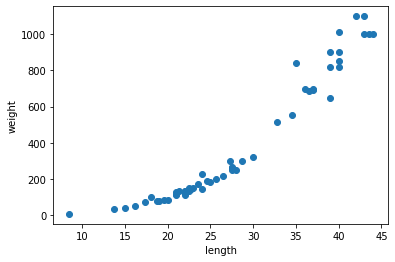

In [12]:
plt.scatter(perch_length,perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target=train_test_split(perch_length,perch_weight, random_state=42)

In [14]:
print(train_input.shape, test_input.shape)
train_input=train_input.reshape(-1,1)
test_input=test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42,) (14,)
(42, 1) (14, 1)


#결정계수 ($R^2$)
- k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborsRegressor 이다

In [15]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
knr= KNeighborsRegressor()

knr.fit(train_input,train_target)

KNeighborsRegressor()

In [19]:
print(knr.score(test_input,test_target))

0.992809406101064


위의 0.9928...의 점수가 결정 계수이다 

$$ R^2=1- {{(타깃- 예측)^2의 합} \over {(타깃- 평균)^2의 합 }}$$


In [20]:
from sklearn.metrics import mean_absolute_error

test_predic=knr.predict(test_input)

mae=mean_absolute_error(test_target,test_predic)
print(mae)

19.157142857142862


In [21]:
print(knr.score(train_input,train_target))

0.9698823289099254


테스트 score 0.9928... 훈련 score  0.9698...

#과대 적합
- 훈련세트에서는 점수가 잘 나오나 테스트 세트에서 점수가 잘 나오지 않아 생기는 현상
- 훈련세트에서만 잘 작동함

#과소 적합
- 테스트세트에서는 점수가 잘 나오나 훈련세트에서 점수가 잘 나오지 않는 경우
- 또는 두점수 다 낮게 나오는 경우
- 모델이 너무 단순하거나 데이터세트가 매우 작은 경우

##우리는 과소 적합으로 볼수도 있다.


In [22]:
knr.n_neighbors=3

knr.fit(train_input,train_target)
print(knr.score(train_input,train_target))

0.9804899950518966


In [23]:
print(knr.score(test_input,test_target))

0.9746459963987609


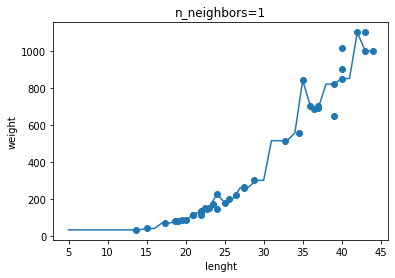

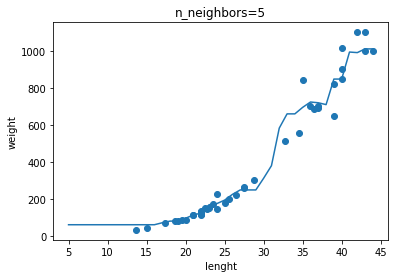

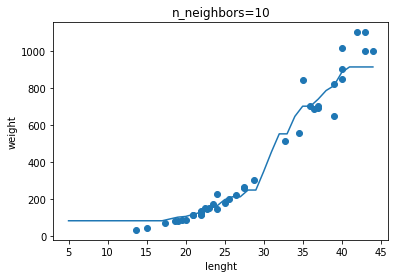

In [24]:
knr=KNeighborsRegressor()

x=np.arange(5,45).reshape(-1,1)

for i in [1,5,10]:
  knr.n_neighbors=i
  knr.fit(train_input,train_target)
  predict=knr.predict(x)

  plt.scatter(train_input,train_target)
  plt.plot(x,predict)
  plt.title('n_neighbors={}'.format(i))
  plt.xlabel('lenght')
  plt.ylabel('weight')
  plt.show()

In [26]:
knr1=KNeighborsRegressor(n_neighbors=3)
knr1.fit(train_input,train_target)
print(knr1.predict([[50]]))

[1033.33333333]


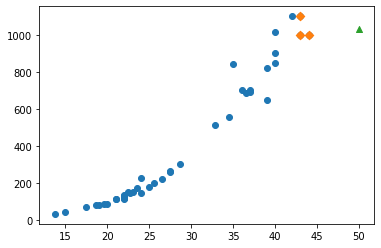

In [27]:
distances,indexs= knr1.kneighbors([[50]])

plt.scatter(train_input,train_target)
plt.scatter(train_input[indexs],train_target[indexs],marker='D')

plt.scatter(50,1033.33,marker='^')
plt.show()

In [28]:
np.mean(train_target[indexs])

1033.3333333333333

In [29]:
print(knr1.predict([[100]]))

[1033.33333333]


- 위 결과들로 종합하였을 떄 k 최근접 이웃 알고리즘 말고 다른 알고리즘을 사용함을 알게되었다.

# 선형회귀

- 대표적으로 사용하는 회귀 알고리즘

In [30]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(train_input,train_target)

print(lr.predict([[50]]))

[1241.83860323]


In [31]:
print(lr.coef_, lr.intercept_)

[39.01714496] -709.0186449535477


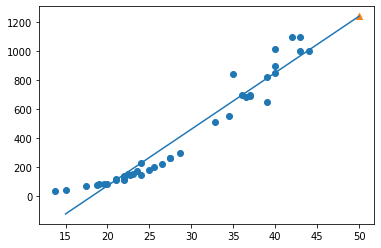

In [32]:
plt.scatter(train_input,train_target)
plt.plot([15,50],[15*lr.coef_+lr.intercept_,50*lr.coef_+lr.intercept_])
plt.scatter(50,1241.83860323,marker='^')
plt.show()

In [33]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


- 위의 그래프 밑을 보면 값이 선형으로 표현하기 힘든 경우가 나오는 것을 볼 수 있다.
- 그래서 우리는
# 다항회귀 
- 다항회귀를 사용할 것이다
- 위 그래프를 직선(linear) 하게 하는 것 보단 구부러진 곡선으로 하는 것이 조금 더 적합할 것이다


In [35]:
train_poly=np.column_stack((train_input**2,train_input))
test_poly=np.column_stack((test_input**2,test_input))

print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [36]:
lr=LinearRegression()
lr.fit(train_poly, train_target)

print(lr.predict([[50**2,50]]))

[1573.98423528]


In [37]:
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.0502107827827


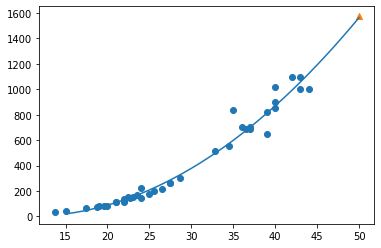

In [39]:
point=np.arange(15,51)

plt.scatter(train_input,train_target)
plt.plot(point,1.01*point**2-21.56*point+116.05)

plt.scatter(50,1573.98,marker='^')
plt.show()

In [40]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325122


In [41]:
import pandas as pd 
df=pd.read_csv('https://bit.ly/perch_csv_data')
perch_full=df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [42]:
train_input,test_input,train_target,test_target=train_test_split(perch_full,perch_weight,random_state=42)

#사이킷런 변환기
- 특성을 만들거나 전처리 하기 위한 클래스
- fit(),transform() 메소드 제공

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly=PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [45]:
poly=PolynomialFeatures(include_bias=False)
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [47]:
poly=PolynomialFeatures(include_bias=False)
poly.fit(train_input)

train_poly=poly.transform(train_input)
print(train_poly.shape)

(42, 9)


In [49]:
test_poly=poly.transform(test_input)
print(test_poly.shape)

(14, 9)


In [50]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [52]:
lr=LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9903183436982124
0.9714559911594134


#특성을 매우 많이 하지만 적은 데이터로 과적합을 확인

In [55]:
poly=PolynomialFeatures(degree=5,include_bias=False)
poly.fit(train_input)

train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)

print(train_poly.shape)
print(poly.get_feature_names())

(42, 55)
['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2', 'x0^3', 'x0^2 x1', 'x0^2 x2', 'x0 x1^2', 'x0 x1 x2', 'x0 x2^2', 'x1^3', 'x1^2 x2', 'x1 x2^2', 'x2^3', 'x0^4', 'x0^3 x1', 'x0^3 x2', 'x0^2 x1^2', 'x0^2 x1 x2', 'x0^2 x2^2', 'x0 x1^3', 'x0 x1^2 x2', 'x0 x1 x2^2', 'x0 x2^3', 'x1^4', 'x1^3 x2', 'x1^2 x2^2', 'x1 x2^3', 'x2^4', 'x0^5', 'x0^4 x1', 'x0^4 x2', 'x0^3 x1^2', 'x0^3 x1 x2', 'x0^3 x2^2', 'x0^2 x1^3', 'x0^2 x1^2 x2', 'x0^2 x1 x2^2', 'x0^2 x2^3', 'x0 x1^4', 'x0 x1^3 x2', 'x0 x1^2 x2^2', 'x0 x1 x2^3', 'x0 x2^4', 'x1^5', 'x1^4 x2', 'x1^3 x2^2', 'x1^2 x2^3', 'x1 x2^4', 'x2^5']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [56]:
lr.fit(train_poly,train_target)
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9999999999991097
-144.40579242684848


In [58]:
print(lr.coef_,lr.intercept_)

[-2.09046286e+04 -1.28182177e+03 -5.60568587e+03  2.08210606e+03
  1.22297051e+03 -1.43811540e+03 -4.56962070e+03 -5.32891417e+02
  6.00788380e+03 -2.10700052e+01 -6.86630547e+01 -1.38720413e+03
 -1.07566030e+03  3.95364102e+03  5.36644563e+03  3.82395517e+03
 -5.41578595e+03 -7.44650725e+03 -3.57626691e+03 -8.28151603e+00
  3.60946181e+02 -4.02975688e+02 -3.16263595e+03  3.78221470e+03
  1.35360877e+03  9.49694720e+03 -9.03127652e+03 -7.05277641e+03
 -5.77034173e+03 -9.30116997e+03  5.09465750e+03  9.77745663e+03
  9.37625135e+03  7.91894742e+03 -2.17004839e+00  3.18815197e+01
  1.05750599e+01  1.25145412e+02 -1.16343733e+03  8.34274225e+02
 -1.83477034e+03  7.09702960e+03 -1.74946596e+03 -3.82035083e+03
  5.50888378e+03 -1.57853612e+04 -1.46750807e+03  8.08789552e+03
  8.01725139e+03 -5.22510168e+03  1.18582793e+04  6.17623466e+03
 -7.04139963e+03 -6.28440330e+03 -7.60671211e+03] 95685.98067457725


#규제
- 너무 과도하게 학습하지 못하도록 훼방하는 것

- 과대적합하지 않도록 만드는 것

- StandardScaler 로 표준 점수를 바꾸어 보겠습니다
- 그후 규제를 추가한 선형화귀 모델 릿지와 라쏘를 추가합니다
- 둘 알고리즘모두 규제를 적용하고 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있습니다 


In [63]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

In [64]:
from sklearn.linear_model import Ridge

In [66]:
ridge=Ridge()
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9896101671037343
0.9790693977615391


#알파 값
- 하이퍼파라미터로 인간이 지정해줘야 하는 것

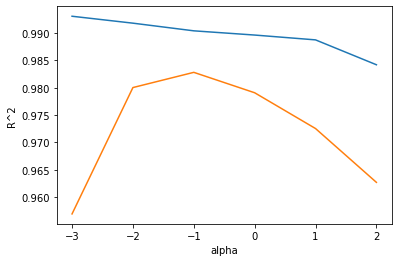

In [67]:
train_score=[]
test_score=[]

alphas=[0.001,0.01,0.1,1,10,100]

for alpha in alphas:
  ridge=Ridge(alpha=alpha)
  ridge.fit(train_scaled,train_target)
  train_score.append(ridge.score(train_scaled,train_target))
  test_score.append(ridge.score(test_scaled,test_target))

plt.plot(np.log10(alphas),train_score)
plt.plot(np.log10(alphas),test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [68]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570365
0.9827976465386884
